# Univariate Linear Regression <small>on the California Housing Prices Dataset</small>
-----------------------------
### Goal
Examining the relationship between median house value and three factors: median income, population, and number of households. Three separate linear regression models are to be created for each factor, aiming to quantify their impact on house values.

The source of the data is from [Kaggle: California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)
<hr style="height: 3px; background-color: black;">

## Exploratory Data Analysis <small>(EDA)</small>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/housing.csv")
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The variables provided in this dataset are as follows: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, and median_house_value.

The statistics derived from `data.describe()` offer an overview of the distribution and central tendencies of the dataset, providing insights to the housing-related features

The variables that are taken into consideration are the following: <br>
`median_hosue_value`:  It is usually the dependent variable in regression models, having a range from $14,999 to $500,001.<br>
`population`: This showcases the variability which suggests the differences in sizes of community.
Population being as small as 3 while reaching a max of 35,682. There is a huge difference between the range.<br>
`households`: Households having a range of 1 to 6082, justify the population variabilities.<br>
`median_income`: The income has a diverse range, reflecting different levels across the dataset, ranging from 0.499 to 15 <br>

The other issue which is noticable is that there are a few entries missing under the `total_bedrooms` which indicates that there is a possibility of data inconsistency.<hr style="height: 3px; background-color: black;">

#### Case (i) - Median House Value and Median Income

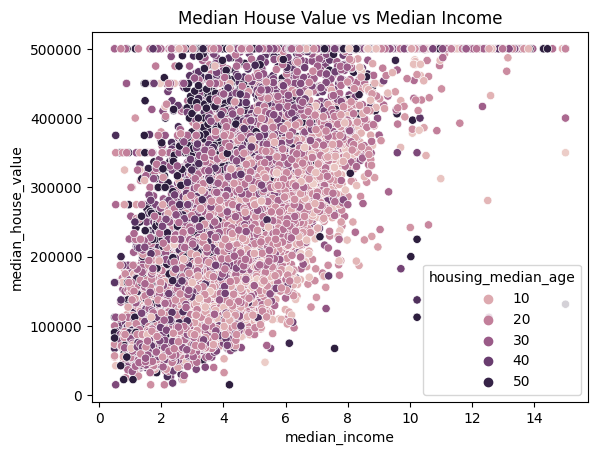

In [2]:
sns.scatterplot(x='median_income', y='median_house_value', data=data, hue='housing_median_age')
plt.title("Median House Value vs Median Income")
plt.show()

#### Review
The above plot clearly demonstrates that median income and median hosue value are in proportion, as the median income is increased, the house value is also increased to an extent (apart from the exceptions which are always present). We can also notice that majority of the houses having an age of more than 40 are between the median income groups of 0-5. <hr style="height: 3px; background-color: black;">

#### Case (ii) - Median House Value and Households

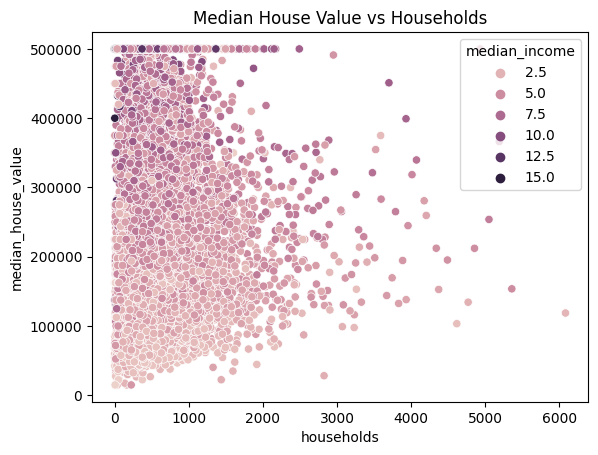

In [3]:
sns.scatterplot(x='households', y='median_house_value', data=data, hue='median_income')
plt.title("Median House Value vs Households")
plt.show()

#### Review
The above plot clearly displays that majority of the households are in the range of 0-2000. Accoding to the median_income we can notice that the groups having the higher income also have a high median house value, which indicates its proportionality. <hr style="height: 3px; background-color: black;">

#### Case (iii) - Median House Value and Population

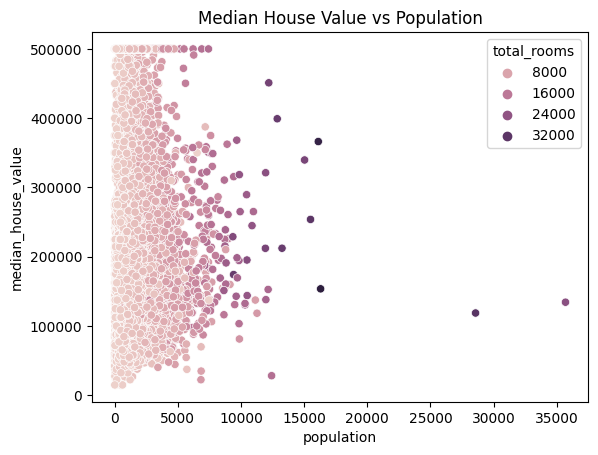

In [4]:
sns.scatterplot(x='population', y='median_house_value', data=data, hue='total_rooms')
plt.title("Median House Value vs Population")
plt.show()

#### Review
From the above scatterplot we can analyse that the population is diversely distributed when it comes towards the house value but we notice that as the population increases they prefer to have a house which has more number of bedrooms. This showcases the need of more space with the growing population. <hr style="height: 3px; background-color: black;">

### Linear Regression Fitting
-------------------


#### Case (i) - Median House Value and Median Income

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

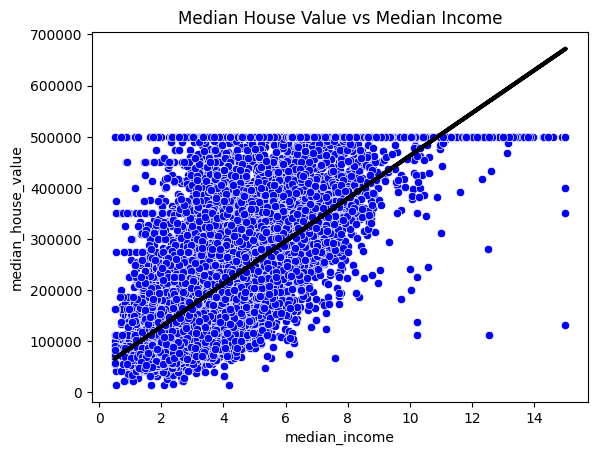

Mean squared error: 7011311502.929527
Mean absolute error: 62625.9337911434

Intercept: [45085.57670327]
Coefficients: [41793.8492019]


In [6]:
median_income_model = linear_model.LinearRegression()
median_income_model.fit(X=data[["median_income"]], y=data[["median_house_value"]])

# plot the regression line against the training data
sns.scatterplot(x="median_income", y="median_house_value", data=data, color="blue")
plt.plot(data[["median_income"]], median_income_model.predict(data[["median_income"]]), color="black", linewidth=3)
plt.title("Median House Value vs Median Income")
plt.show()

print(f"Mean squared error: {mean_squared_error(data[['median_house_value']], median_income_model.predict(data[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(data[['median_house_value']], median_income_model.predict(data[['median_income']]))}")
print()
print(f"Intercept: {median_income_model.intercept_}")
print(f"Coefficients: {median_income_model.coef_[0]}")

<hr style="height: 3px; background-color: black;">

#### Case (ii) - Median House Value and Households

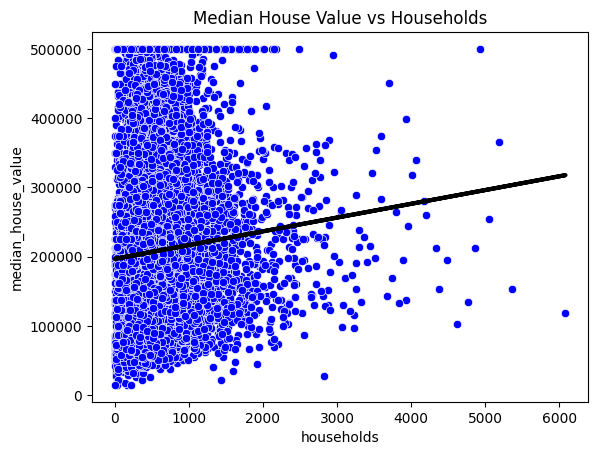

Mean squared error: 13257776904.728533
Mean absolute error: 90802.74324318446

Intercept: [196928.57716233]
Coefficients: [19.87277516]


In [7]:
households_model = linear_model.LinearRegression()
households_model.fit(X=data[["households"]], y=data[["median_house_value"]])

# plot the regression line against the training data
sns.scatterplot(x="households", y="median_house_value", data=data, color="blue")
plt.plot(data[["households"]], households_model.predict(data[["households"]]), color="black", linewidth=3)
plt.title("Median House Value vs Households")
plt.show()

print(f"Mean squared error: {mean_squared_error(data[['median_house_value']], households_model.predict(data[['households']]))}")
print(f"Mean absolute error: {mean_absolute_error(data[['median_house_value']], households_model.predict(data[['households']]))}")
print()
print(f"Intercept: {households_model.intercept_}")
print(f"Coefficients: {households_model.coef_[0]}")

<hr style="height: 3px; background-color: black;">

#### Case (iii) - Median House Value and Population

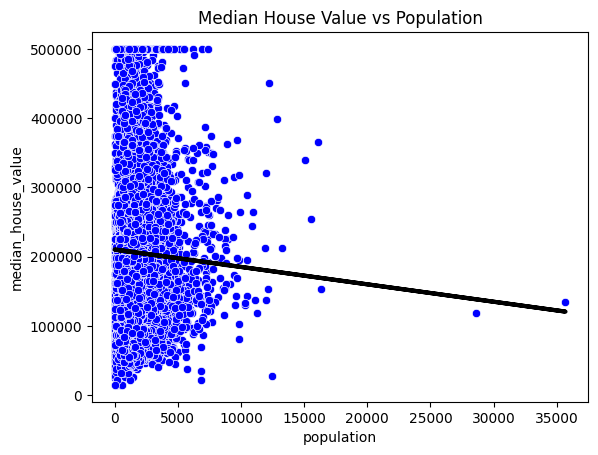

Mean squared error: 13307412412.389355
Mean absolute error: 91153.8200947318

Intercept: [210436.26207627]
Coefficients: [-2.51175277]


In [8]:
population_model = linear_model.LinearRegression()
population_model.fit(X=data[["population"]], y=data[["median_house_value"]])

# plot the regression line against the training data
sns.scatterplot(x="population", y="median_house_value", data=data, color="blue")
plt.plot(data[["population"]], population_model.predict(data[["population"]]), color="black", linewidth=3)
plt.title("Median House Value vs Population")
plt.show()

print(f"Mean squared error: {mean_squared_error(data[['median_house_value']], population_model.predict(data[['population']]))}")
print(f"Mean absolute error: {mean_absolute_error(data[['median_house_value']], population_model.predict(data[['population']]))}")
print()
print(f"Intercept: {population_model.intercept_}")
print(f"Coefficients: {population_model.coef_[0]}")

<hr style="height: 3px; background-color: black;">

### Summary
------------------
| **Model** | **Intercept** | **Slope** | **Mean Squared Error** | **Mean Absolute Error** |
|----------|----------|----------|----------|----------|
| Med_Income | 45085.576 | 41793.849 | 7011311502.929 | 62625.933 |
| Households | 196928.577 | 19.872 | 13257776904.728 | 90802.743 |
| Population | 210436.262 | -2.511 | 13307412412.389 | 91153.820 |

<hr style="height: 3px; background-color: black;">

### Conclusion
---------------



Median income model has a lower Mean Squared Error, which indicates a better performance when compared to the other models. <br>
Households model has a relatively higher Mean Squared Error and Mean Absolute Error.<br>
Population model also shows higher errors, indicating potential limitations in its predictive accuracy. <br>

Overall, the models have varying intercepts, slopes and the error metrics.<hr style="height: 3px; background-color: black;">